**Alina Florencia Karuniawati - PYTN-KS10-001**

# Import Package

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
import seaborn as sns
from scipy.stats import friedmanchisquare
from statsmodels.stats.diagnostic import normal_ad

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Overview Data

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv', na_values =[' -  '])
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


- Borough: The name of the borough in which the property is located. 
- Neighborhood:Department of Finance assessors determine the neighborhood name in the course of valuing properties. The common name of the neighborhood is generally the same as the name Finance designates. However, there may be slight differences in neighborhood boundary lines and some sub-neighborhoods may not be included. 
- Building Class Category: This is a field that we are including so that users of the Rolling Sales Files can easily identify similar properties by broad usage (e.g. One Family Homes) without looking up individual Building Classes.
- Tax Class at Present: Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property. 
- Block: A Tax Block is a sub-division of the borough on which real properties are located. 
- Lot: A Tax Lot is a subdivision of a Tax Block and represents the property unique location.
- Easement: An easement is a right, such as a right of way, which allows an entity to make limited use of another’s real property.
- Building Class at Present: The Building Classification is used to describe a property’s constructive use.
- Address: The street address of the property as listed on the Sales File. Coop sales include the apartment number in the address field. 
- Zip Code: The property’s postal code 
- Residential Units: The number of residential units at the listed property. 
- Commercial Units: The number of commercial units at the listed property.
- Total Units: The total number of units at the listed property.
- Land Square Feet: The land area of the property listed in square feet. 
- Gross Square Feet: The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property.
- Year Built: Year the structure on the property was built. 
- Building Class at Time of Sale: The Building Classification is used to describe a property’s constructive use
- Sales Price: Price paid for the property
- Sale Date: Date when the property sold

# Check Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84548 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

# Check Missing Values

In [4]:
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

## Handle Missing Values

### Replace Missing Values with Median

In [5]:
median1 = df['LAND SQUARE FEET'].median()
median2 = df['GROSS SQUARE FEET'].median()
median3 = df['SALE PRICE'].median()
df['LAND SQUARE FEET'].fillna(median1, inplace=True)
df['GROSS SQUARE FEET'].fillna(median2, inplace=True)
df['SALE PRICE'].fillna(median3, inplace=True)

# Change Data Type

In [6]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

# Drop Unnecessary Column

In [7]:
df['SALE YEAR'] = pd.DatetimeIndex(df['SALE DATE']).year

In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['SALE DATE'], axis=1, inplace=True)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016


# Check Outliers

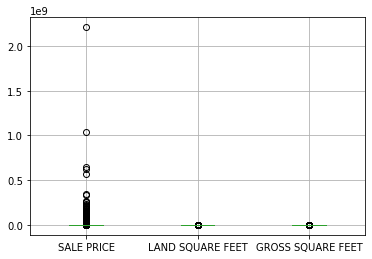

In [9]:
df.boxplot(column=['SALE PRICE','LAND SQUARE FEET','GROSS SQUARE FEET'])
plt.show()

Berdasarkan boxplot di atas, outlier terbanyak ada pada SALE PRICE. Oleh karena itu, kami akan membuang outlier pada kolom sale price

In [10]:
Q1 = df['SALE PRICE'].quantile(0.25)
Q3 = df['SALE PRICE'].quantile(0.75)
print('Q1: \n',Q1)
print('Q3: \n',Q3)

Q1: 
 300000.0
Q3: 
 830000.0


In [11]:
IQR = Q3 - Q1
print(IQR)

530000.0


In [12]:
df = df[~((df['SALE PRICE'] < (Q1-1.5*IQR))|(df['SALE PRICE']>(Q3+1.5*IQR)))]
df.shape

(75803, 21)

# Data Visualization

In [13]:
df['BOROUGH'].value_counts()

4    26133
3    21639
1    12942
5     8347
2     6742
Name: BOROUGH, dtype: int64

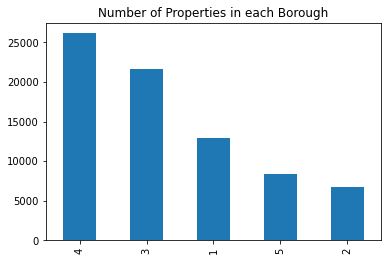

In [14]:
df['BOROUGH'].value_counts().plot(kind='bar')
plt.title('Number of Properties in each Borough')
plt.show()

Keterangan:<br>
`1:` Manhattan <br>
`2:` Bronx<br>
`3:` Brooklyn<br>
`4:` Queens<br>
`5:` Staten Island

# Measure of Central Tendency

Berdasarkan informasi di atas dapat dilihat bahwa sebagian besar properti terletak pada wilayah Queens yang dilambangkan dengan digit code 4. Oleh karena itu, kita akan melihat rata-rata, median, dan modus dari land square feet properti-properti yang ada di wilayah Queens.

### Mean of Land Square Feet in Queens

In [15]:
df[df['BOROUGH']==4]['LAND SQUARE FEET'].mean()

3489.9928060306893

Average number of land square feet of properties in Queens is 3489.99 sq ft

### Median of Land Square Feet in Queens

In [16]:
df[df['BOROUGH']==4]['LAND SQUARE FEET'].quantile(0.5)

2325.0

The median of land square feet of properties in Queens is 2325

### Mode of Land Square Feet in Queens

In [17]:
df[df['BOROUGH']==4]['LAND SQUARE FEET'].mode()

0    2325.0
dtype: float64

Most properties in Queens have approximately 2325 sq ft of land

# Measure of Spread

Berdasarkan informasi di atas dapat dilihat bahwa sebagian besar properti terletak pada wilayah Queens yang dilambangkan dengan digit code 4. Oleh karena itu, kita akan melihat range, variance, dan median dari land square feet properti-properti yang ada di wilayah Queens.

### Range of Land Square Feet in Queens

In [18]:
df[df['BOROUGH']==4]['LAND SQUARE FEET'].max()

4228300.0

Luas tanah properti di wilayah Queens yang paling besar bernilai sebesar 4.228.300 sq ft

In [19]:
df[df['BOROUGH']==4]['LAND SQUARE FEET'].min()

7.0

Luas tanah properti di wilayah Queens yang paling kecil bernilai sebesar 7.0 sq ft

In [20]:
df[df['BOROUGH']==4]['LAND SQUARE FEET'].max() - df[df['BOROUGH']==4]['LAND SQUARE FEET'].min()

4228293.0

Perbedaan luas tanah terbesar dan terkecil pada properti di wilayah Queens cukup signifikan yaitu sebesar 4.228.293. Hal ini dapat disebabkan oleh jenis properti yang dijual.

### Variance of Land Square Feet in Queens

In [21]:
df[df['BOROUGH']==4]['LAND SQUARE FEET'].var()

1413403906.316098

Variance dari luas tanah di Wilayah Queens yaitu sebesar 1413403906.32 yang artinya lebih besar dari mean dan dapat dikatakan terjadi perbedaan yang signifikan antara nilai terkecil dan nilai terbesar.

### Standard Deviation of Land Square Feet in Queens

In [22]:
df[df['BOROUGH']==4]['LAND SQUARE FEET'].std()

37595.26441343508

Standar deviasi dari luas tanah di wilayah Queens sebesar 37595.26

# Probability Distribution

### Distribution of the Age of the Property when Sold in NYC

In [23]:
df['Age of Properties'] = df['SALE YEAR'] - df['YEAR BUILT']

In [24]:
df2 = df[df['YEAR BUILT']>0]
df2.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,Age of Properties
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016,116
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016,116
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,...,0,20,2581.0,9730.0,1900,2,C4,530000.0,2017,117
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,...,2,46,5163.0,21007.0,1900,2,C7,530000.0,2017,117
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,...,0,15,1534.0,9198.0,1920,2,D5,530000.0,2017,97


p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


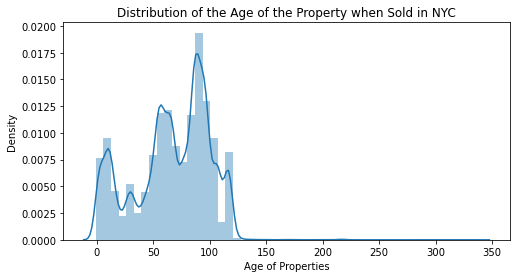

Age of Properties are not normally distributed


In [25]:
p_value = normal_ad(df2['Age of Properties'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)


plt.subplots(figsize=(8, 4))
plt.title('Distribution of the Age of the Property when Sold in NYC', fontsize=12)
sns.distplot(df2['Age of Properties'])
plt.show()


if p_value < 0.05:
    print('Age of Properties are not normally distributed')
else:
    print('Age of Properties normally distributed')

In [26]:
df2['Age of Properties'].skew()

-0.42107058974195444

In [27]:
print('mean:',df2['Age of Properties'].mean())
print('std:', df2['Age of Properties'].std())

mean: 66.56967412799862
std: 33.115568868049145


Berdasarkan visualisasi di atas dapat dikatakan bahwa data umur properti di NYC ketika dijual memiliki skewness sebesar -0.421, dengan kata lain data umur properti di NYC ketika dijual tergolong symmetric (Rule of Thumb symmetric: [-0.5, 0.5]). Dalam hal ini persebaran data umur properti ketika dijual berada di range mean ± 1 * std, yaitu berada pada rentang  33.46 ⩽ Umur Properti ⩽ 99.68. Akan tetapi berdasarkan Anderson Darling Test, distribusi dari age of properties ketika dijual di NYC tidak berdistribusi normal

# Confidence Interval

In [28]:
df['NEIGHBORHOOD'].value_counts().head(5)

FLUSHING-NORTH             2924
BEDFORD STUYVESANT         1259
UPPER EAST SIDE (59-79)    1214
BOROUGH PARK               1146
BAYSIDE                    1131
Name: NEIGHBORHOOD, dtype: int64

Berdasarkan data di atas, flushing-north merupakan neighborhood dengan jumlah properti yang paling banyak. Oleh karena itu kita akan mengetahui Confidence Interval untuk mean total unit pada populasi Neighborhood Flushing-North

In [29]:
avg = df[df['NEIGHBORHOOD']=='FLUSHING-NORTH']['TOTAL UNITS'].mean()
std = df[df['NEIGHBORHOOD']=='FLUSHING-NORTH']['TOTAL UNITS'].std()
n = len(df[df['NEIGHBORHOOD']=='FLUSHING-NORTH'])
z = 1.96 #z score untuk Confidence Level 95%

In [30]:
se = std/ np.sqrt(n)

In [31]:
lcb = avg - z * se
ucb = avg + z * se
print('Confidence Interval: [',lcb,',',ucb,']')

Confidence Interval: [ 1.11281725283216 , 1.4610541561965678 ]


The true mean of the total units in Flushing-North Neighborhood will fall between 1.11 and 1.46

# Hypothesis Testing using Friedman Test

$H_0$ : **`The Sale Prices of Properties in Manhattan, Bronx, Brooklyn, Queens, Staten Island is equal`** <br>
$H_1$ : **`The Sale Prices of Properties in NYC at least differ in 2 boroughs`** <br>

In [32]:
data1 = df[df['BOROUGH']==1]['SALE PRICE'].sample(1000, random_state=1).to_list()
data2 = df[df['BOROUGH']==2]['SALE PRICE'].sample(1000, random_state=1).to_list()
data3 = df[df['BOROUGH']==3]['SALE PRICE'].sample(1000, random_state=1).to_list()
data4 = df[df['BOROUGH']==4]['SALE PRICE'].sample(1000, random_state=1).to_list()
data5 = df[df['BOROUGH']==5]['SALE PRICE'].sample(1000, random_state=1).to_list()

In [33]:
stat, p = friedmanchisquare(data1,data2,data3,data4,data5)
print('stat=%.3f, p=%.3f' %(stat,p))
if p > 0.05:
    print('The Sale Prices of Properties in Manhattan, Bronx, Brooklyn, Queens, Staten Island is equal')
else: 
    print('The Sale Prices of Properties in NYC at least differ in 2 boroughs')

stat=831.980, p=0.000
The Sale Prices of Properties in NYC at least differ in 2 boroughs


Berdasarkan hasil uji hipotesis dengan menggunakan friedman test, dapat dikatakan Reject H0 karena p-value < 0.05. Oleh karena itu, dapat disimpulkan bahwa harga jual properti dari kelima wilayah di NYC (Manhattan, Bronx Brooklyn, Queens, Staten Island) setidaknya berbeda di dua wilayah

# Conclusion

1. Properti yang banyak terjual di NYC adalah di wilayah Queens
2. Rata-rata luas tanah properti di Queens adalah sebesar 3489.99 sq ft
3. Median dan modus luas tanah properti di Queens adalah sebesar 2325 sq ft
4. Luas tanah properti di wilayah Queens yang paling besar bernilai sebesar 4.228.300 sq ft
5. Luas tanah properti di wilayah Queens yang paling kecil bernilai sebesar 7.0 sq ft
6. Perbedaan luas tanah terbesar dan terkecil pada properti di wilayah Queens cukup signifikan yaitu sebesar 4.228.293 sq ft
7. Variance dari luas tanah di Wilayah Queens yaitu sebesar 1413403906.32
8. Standar deviasi dari luas tanah di wilayah Queens sebesar 37595.26
9. Distribusi dari umur properti ketika dijual tidak termasuk distribusi normal. Persebaran data umur properti ketika dijual berada di range mean ± 1 * std, yaitu berada pada rentang 33.46 ⩽ Umur Properti ⩽ 99.68.
10. Rata-rata sebenarnya dari total unit di Flushing-North Neighborhood antara 1,11 dan 1,46
11. Harga jual properti dari kelima wilayah di NYC (Manhattan, Bronx Brooklyn, Queens, Staten Island) setidaknya berbeda di dua wilayah